<h1>Questions to be handed in for project 7:</h1>

<p>To get started, we load the <code>Gadfly</code> backend for <code>Plots</code> so that we can make plots, and the <code>Roots</code> package for its <code>D</code> and <code>fzero</code> functionality:</p>

In [ ]:
using Plots
gadfly()
using Roots			

<h3>Quick background</h3>

<p>Read about this material here: <a href="http://mth229.github.io/first-second-derivatives.html">Exploring first and second derivatives with Julia</a>.</p>

<p>For the impatient, this assignment looks at the relationship between a function, &#36;f&#40;x&#41;&#36;, and its first and second derivatives, &#36;f&#39;&#40;x&#41;&#36; and &#36;f&#39;&#39;&#40;x&#41;&#36;. The basic relationship can be summarized (though the devil is in the details) by:</p>

<ol>
<li>if the first derivative is _positive_ on &#36;&#40;a,b&#41;&#36; then the function   is _increasing_ on &#36;&#40;a,b&#41;&#36;.</li>
</ol>

<ol>
<li>If the second derivative is _positive_ on &#36;&#40;a,b&#41;&#36; then the function   is _concave up_ on &#36;&#40;a,b&#41;&#36;.</li>
</ol>

<p>(The devil here is that the converse statements are not quite always true.)</p>

<p>We can use the <code>D</code> operator from the <code>Roots</code> package to find the first and second derivatives of <code>f</code>. Recall, if <code>f</code> is a function, then <code>D&#40;f&#41;</code> will be a function that computes its <em>first</em> derivative and <code>D&#40;f,2&#41;</code> will be a function that computes its <em>second</em> derivative. If you define this function (ignoring any warnings):</p>

In [ ]:
Base.ctranspose(f::Function) = D(f)

ctranspose (generic function with 53 methods)

<p>then you can use <code>f&#39;</code> instead of <code>D&#40;f&#41;</code> and <code>f&#39;&#39;</code> in place of <code>D&#40;f,2&#41;</code>.</p>

<p>In the notes, the following function is used to plot a function <code>f</code> using two colors depending on whether the second function, <code>g</code> is positive or not.</p>

In [ ]:
function plotif(f, g, a, b)
  plot([f, x -> g(x) > 0.0 ? f(x) : NaN], a, b, linewidth=5)
end

plotif (generic function with 1 method)

<p>This allows a graphical exploration of the above facts. For example, this graph shows where the sine function in <em>increasing</em> over &#36;&#91;0, 2pi&#93;&#36;:</p>

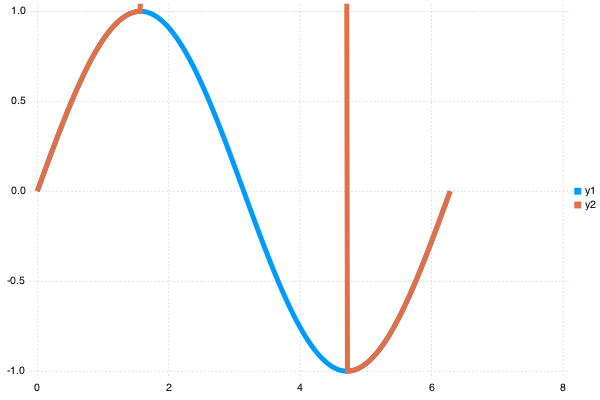

In [ ]:
f(x) = sin(x)
plotif(f, f', 0, 2pi)		# shows sin(x) and when its derivative is 0

<p><br/></p>

<p>As a reminder</p>

<ul>
<li>a _critical_ point of &#36;f&#36; is a value in the domain of &#36;f&#40;x&#41;&#36; for which the derivative is &#36;0&#36; or undefined. These are often but <strong>not always</strong> where &#36;f&#40;x&#41;&#36; has a local maximum or minimum. </li>
</ul>

<ul>
<li>An _inflection point_ of &#36;f&#36; is a value in the domain of &#36;f&#40;x&#41;&#36; where the concavity of &#36;f&#36; changes. (These are _often_ but <strong>not always</strong> where &#36;f&#39;&#39;&#40;x&#41;&#61;0&#36;.)</li>
</ul>

<p>We can graphically identify these points or find them numerically by finding zeroes of the appropriate function. To find zeros we have the function call <code>fzero&#40;f, a&#41;</code> to find a zero iteratively starting at &#36;x&#61;aS&#36; or <code>fzeros&#40;f, &#91;a,b&#93;&#41;</code> to nievely search for any zeros in the interval &#36;&#91;a,b&#93;&#36;.  (Recall, <code>fzeros</code> may miss some values, so a graph should always be made to double check)</p>

<p>For example:</p>

In [ ]:
f(x) = 1 + cos(x) + cos(2x)
fzero(f, 1.5)

1.5707963267948966

<p>Or to get all values in an interval:</p>

In [ ]:
fzeros(f, [0, 2pi])

4-element Array{Float64,1}:
 1.5708 
 2.0944 
 4.18879
 4.71239

<p>The answer from <code>fzeros</code> is a vector of values, which may require some extra work.</p>

<h3>Questions</h3>

<h4>Graphical explorations</h4>

<ul>
<li>The <code>airy</code> function is a *built&#36;-in function that is important for   some applications. It is likely to be unfamiliar. Make a graph using   &#96;plotif&#96; to investigate when the &#96;airy&#96; function is positive on the   interval &#36;&#40;-5,5&#41;&#36;. Your answer should use interval   notation. (Recall, when the second function passed to <code>plotif</code> is   positive, the graph uses a different color, so you need to think   about what function that should be.)</li>
</ul>

<ul>
<li>Make a graph using <code>plotif</code> to investigate when the function &#36;f&#40;x&#41; &#61;   x^x&#36; is _increasing_ on the interval &#36;&#40;0,2&#41;&#36;. Your answer should use   interval notation. </li>
</ul>

<ul>
<li>Make a graph using <code>plotif</code> to investigate when the function</li>
</ul>

&#36;~
f&#40;x&#41; &#61; \frac&#123;x&#125;&#123;x^2&#43;9&#125;
~&#36;

<p>is _concave up_ on the interval &#36;&#40;-10,10&#41;&#36;. Your answer should use interval notation. </p>

<ul>
<li>Make a graph using <code>plotif</code> to identify any _critical points_ of   &#36;f&#40;x&#41; &#61; x \ln&#40;x&#41;&#36; on the interval &#36;&#40;0,4&#41;&#36;. Points where the function changes from increasing to decreasing will be critical points (though there may be others).</li>
</ul>

<ul>
<li>Make a graph using <code>plotif</code> to identify any _inflection points_ of   &#36;f&#40;x&#41; &#61; \sin&#40;x&#41; - x&#36; over the interval &#36;&#40;-5,5&#41;&#36;. Points where the function changes concavity are inflection points (though there may be others).</li>
</ul>

<ul>
<li>For any polynomial &#36;p&#40;x&#41;&#36;, between any two consecutive zeros there must be a   critical point, perhaps more than one.</li>
</ul>

<p>For &#36;p&#40;x&#41; &#61;x^4 &#43; x^3 - 7x^2 - x &#43; 6&#36;, there are zeros &#36;-3&#36;, &#36;-1&#36;, &#36;1&#36; and &#36;2&#36;. Find the critical points using <code>plotif</code>. Which critical point(s) are between &#36;-1&#36; and &#36;1&#36;?</p>

<h4>Finding more precise numeric values</h4>

<ul>
<li>Use <code>fzero</code> to numerically identify all _critical points_ to the function &#36;f&#40;x&#41; &#61; 2x^3 - 6x^2 - 2x &#43; 4&#36;. (There are no more than &#36;2&#36;.)</li>
</ul>

<ul>
<li>Use <code>fzero</code> to numerically identify all _inflection points_ for the   function &#36;f&#40;x&#41; &#61; \ln&#40;x^2 &#43; 2x &#43; 5&#41;&#36;.</li>
</ul>

<ul>
<li>Numerically identify all _critical points_ to the rational function &#36;f&#40;x&#41;&#36; defined below. Graphing is useful to identify where the possible values are.</li>
</ul>

&#36;~
f&#40;x&#41; &#61; \frac&#123;&#40;x-3&#41;\cdot &#40;x-1&#41;\cdot &#40;x&#43;1&#41;\cdot &#40;x&#43;3&#41;&#125;&#123;&#40;x-2&#41;\cdot &#40;x&#43;2&#41;&#125;.
~&#36;

<ul>
<li>Suppose &#36;f&#39;&#40;x&#41; &#61; x^3 - 6x^2 &#43; 11x - 6&#36;. Where is &#36;f&#40;x&#41;&#36; increasing?   Use interval notation in your answer.</li>
</ul>

<ul>
<li>Suppose &#36;f&#39;&#39;&#40;x&#41; &#61; x^2 - 3x &#43; 2&#36;. Where is &#36;f&#40;x&#41;&#36; concave up? Use   interval notation in your answer.</li>
</ul>

<h3>The derivative tests</h3>

<h4>The first derivative test</h4>

<p>This states that for a differentiable function &#36;f&#40;x&#41;&#36; with a critical point at &#36;c&#36; then if &#36;f&#39;&#40;x&#41;&#36; changes sign from &#36;&#43;&#36; to &#36;-&#36; at &#36;c&#36; then &#36;f&#40;c&#41;&#36; is a local maximum and if it changes sign from &#36;-&#36; to &#36;&#43;&#36; then &#36;f&#40;c&#41;&#36; is a local minimum.</p>

<ul>
<li>For the function &#36;f&#40;x&#41;&#36; suppose you know &#36;f&#39;&#40;x&#41;&#61;x^3 - 5x^2 &#43; 8x - 4&#36;. Find <em>all</em> the critical points. Use the first derivative test to classify them as local extrema <em>if</em> you can. If you can't say why.</li>
</ul>

<h4>The second derivative test</h4>

<p>This states that if &#36;c&#36; is a critical point of &#36;f&#40;x&#41;&#36; and &#36;f&#39;&#39;&#40;c&#41; &gt; 0&#36; then &#36;f&#40;c&#41;&#36; is a local minimum and if &#36;f&#39;&#39;&#40;c&#41; &lt; 0&#36; then &#36;f&#40;c&#41;&#36; is a local maximum.</p>

<ul>
<li>Suppose &#36;f&#39;&#40;x&#41; &#61; &#40;x^2 - 2&#41; \cdot e^&#123;-x&#125;&#36;. First find the critical points of &#36;f&#40;x&#41;&#36;, then use the second derivative test to classify them.</li>
</ul>

<p>The critical points are:</p>

<p>Classify your critical points using the second derivative test</p>

<ul>
<li>Suppose &#36;f&#39;&#40;x&#41; &#61; x^3 - 7x^2 &#43; 14&#36;. Based on  the plot over the interval   &#36;&#91;-4, 8&#93;&#36;. On what subintervals is &#36;f&#40;x&#41;&#36; increasing?</li>
</ul>

<p>What did you use to find your last answer?</p>

<p>What are the &#36;x&#36;-coordinates of the relative minima of &#36;f&#40;x&#41;&#36;?</p>

<p>On what subintervals is &#36;f&#40;x&#41;&#36; concave up?</p>

<p>What did you use to decide?</p>

<p>Find the &#36;x&#36; coordinates of the inflection points of &#36;f&#40;x&#41;&#36;.</p>

<ul>
<li>Suppose you know the function &#36;f&#40;x&#41;&#36; has the second derivative given   by the <code>airy</code> function. Use this to answer the following questions   about &#36;f&#40;x&#41;&#36; over the interval &#36;&#40;-5, 0&#41;&#36;.</li>
</ul>

<p>On what interval(s) is the function &#36;f&#40;x&#41;&#36; positive?</p>

<p>On what interval(s) is the function &#36;f&#40;x&#41;&#36; increasing?</p>

<p>On what interval(s) is the function &#36;f&#40;x&#41;&#36; concave up?</p>

<ul>
<li>A simplified model for the concentration of a certain slow-reacting   medicine in the bloodstream &#36;t&#36; hours after injection into muscle   tissue is given by</li>
</ul>

&#36;~
f&#40;t&#41; &#61;  3t^2 \cdot e^&#123;-t/5&#125;, \quad t \geq 0.
~&#36;

<p>When will there be maximum concentration?</p>

<p>In the units given, how much is the maximum concentration?</p>

<p>When will the concentration dip below a level of 1.0?</p>

<p>Estimate from a graph when the concentration function changes concavity:</p>

<h3>Concave up has alternate definitions</h3>

<p>The Rogawski book defines &#36;f&#40;x&#41;&#36; to be concave up for differentiable functions by: </p>

<blockquote>
&#36;f&#40;x&#41;&#36;
<p>is concave up on &#36;&#40;a,b&#41;&#36; if &#36;f&#39;&#40;x&#41;&#36; is increasing on &#36;&#40;a,b&#41;&#36;.</p>
</blockquote>

<p>But, not all functions have derivatives. For <em>continuous</em> functions, an alternate definition of concave up on &#36;&#40;a,b&#41;&#36; is that for any pair of points, &#36;&#40;c,d&#41;&#36; with &#36;a &lt; c &lt; d &lt; b&#36; the function value at the average is less than or equal the average of the function values:</p>

&#36;~
f&#40;\frac&#123;c &#43; d&#125;&#123;2&#125;&#41; \leq \frac&#123;f&#40;c&#41; &#43; f&#40;d&#41;&#125;&#123;2&#125;
~&#36;

<ul>
<li>Verify that this holds for the continuous, concave up function &#36;f&#40;x&#41; &#61; e^x&#36; by picking two values for &#36;c&#36; and &#36;d&#36; and checking the inequality. Show your commands.</li>
</ul>

<p>For any function, <a href="https://en.wikipedia.org/wiki/Convex_function">Wikipedia</a> gives a different definition which basically says &#36;f&#40;x&#41;&#36; is concave up on &#36;&#40;a,b&#41;&#36; if for <strong>any</strong> pair of points, &#36;c&#36; and &#36;d&#36; with &#36;a &lt; c &lt; d &lt; b&#36; the has the secant line connecting &#36;&#40;c,f&#40;c&#41;&#41;&#36; and &#36;&#40;d,f&#40;d&#41;&#41;&#36; lies _above_ the graph of &#36;f&#40;x&#41;&#36; over &#36;&#40;c,d&#41;&#36;.</p>

<p>This can be investigated graphically. This function is helpful for making a secant line:</p>

In [ ]:
function secline(f, c, d)
  x0, y0, m = c, f(c), (f(c) - f(d)) / (c - d)
  x -> y0 + m * (x - x0)	# pt-slope form as function
end

secline (generic function with 1 method)

<p>For a function, say, &#36;f&#40;x&#41; &#61; \sin&#40;x&#41;&#36;, it is used as:</p>

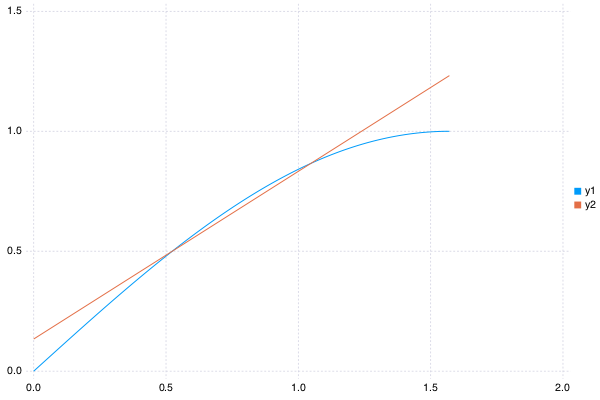

In [ ]:
f(x)=sin(x)
plot([f, secline(f, pi/6, pi/3)], 0, pi/2)

<p>That makes a graph of &#36;\sin&#40;x&#41;&#36; over &#36;&#91;0, \pi/2&#93;&#36; and draws the secant line between &#36;&#91;\pi/6, \pi/3&#93;&#36;. This line lies <em>below</em> the graph of &#36;f&#40;x&#41;&#36;, so we can say definitively that &#36;\sin&#40;x&#41;&#36; is <em>not</em> concave up over &#36;&#91;0, \pi/2&#93;&#36;. (It is concave down.)</p>

<p>For the function &#36;f&#40;x&#41; &#61; x^2 - 2x&#36;, graphically verify &#36;f&#36; is concave up by  showing for any 3 pairs of points between &#36;&#40;-5,5&#41;&#36; the secant line is above &#36;f&#36; over the chosen interval. (You pick the the three pairs of points.) Show your commands.</p>

<ul>
<li>For the function &#36;f&#40;x&#41; &#61; x^3 - 2x&#36; find a pair of points, &#36;c&#36; and   &#36;d&#36;, in &#36;&#40;-3,3&#41;&#36; which illustrate that the function is not concave   up.</li>
</ul>